# DATA EPLORATION AND ENGINEERING

## 1) Loading the wine data

In [3]:
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler


### 1.1) Loading Red Wine

In [5]:
url = "https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-red.csv"

red_wine_df = pd.read_csv(url, delimiter=";", header=0)

In [6]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.2) Loading White Wine

In [8]:
url_white = "https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-white.csv"

white_wine_df = pd.read_csv(url_white, delimiter=";", header=0)

In [9]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
white_wine_df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 2) Cleaning the data

### 2.0) General exploration

#### 2.0.1) Red Wine

In [14]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 2.0.2) White wine 

In [17]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 2.1) Exploring the missing values

#### 2.1.1) Red Wine

In [21]:
red_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 2.1.2) White Wine

In [23]:
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.2) Removing duplicates

#### 2.2.1) Red Wine

In [26]:
duplicates_rw = red_wine_df.duplicated(keep='first').sum()
duplicates_rw

240

In [27]:
red_wine_df_f2 = red_wine_df.drop_duplicates()
red_wine_df_f2.shape[0]

1359

#### 2.2.2) White wine

In [29]:
duplicates_ww = white_wine_df.duplicated(keep='first').sum()
duplicates_ww

937

In [30]:
white_wine_df_f2 = white_wine_df.drop_duplicates()
white_wine_df_f2.shape[0]

3961

## 3) Aggregating the two files

### 3.1) Adding columns to the two data frames

In [33]:
red_wine_df_f2["wine type"] = "red"
white_wine_df_f2["wine type"] = "white"


C:\Users\acm11\AppData\Local\Temp\ipykernel_18100\3092713722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_wine_df_f2["wine type"] = "red"
C:\Users\acm11\AppData\Local\Temp\ipykernel_18100\3092713722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine_df_f2["wine type"] = "white"


### 3.2) Concatenating red_wine_df_f2 and white_wine_df_f2

In [35]:
combined_wine_df = pd.concat([red_wine_df_f2, white_wine_df_f2], ignore_index=True)

## 4) General exploration of combined_wine_df

In [37]:
combined_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
combined_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


## 5) Calculating the descriptive statistics of the numeric data

### 5.1) Statistical descriptions of the values

In [41]:
combined_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 5.2) Calculating the skewness of all the columns with numeric values

#### 5.2.1) Removing wine type (because it isn't numerical)

In [44]:
columns_to_exclude = ["wine type"]

combined_wine_df_numerical = combined_wine_df.drop(columns = columns_to_exclude)

#### 5.2.2) Calculating the skewness of each column

In [46]:
skewness = combined_wine_df_numerical.skew()

print(skewness)

fixed acidity           1.650417
volatile acidity        1.504557
citric acid             0.484309
residual sugar          1.706550
chlorides               5.338237
free sulfur dioxide     1.362719
total sulfur dioxide    0.063614
density                 0.666326
pH                      0.389969
sulphates               1.809454
alcohol                 0.545696
quality                 0.147467
dtype: float64


It seems like the following aren't normally distributed:  
- fixed acidity
- volatile acidity
- residual sugar
- chlorides
- free sulfur dioxide
- sulphates


### 5.3) Visualizing the columns with histograms

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

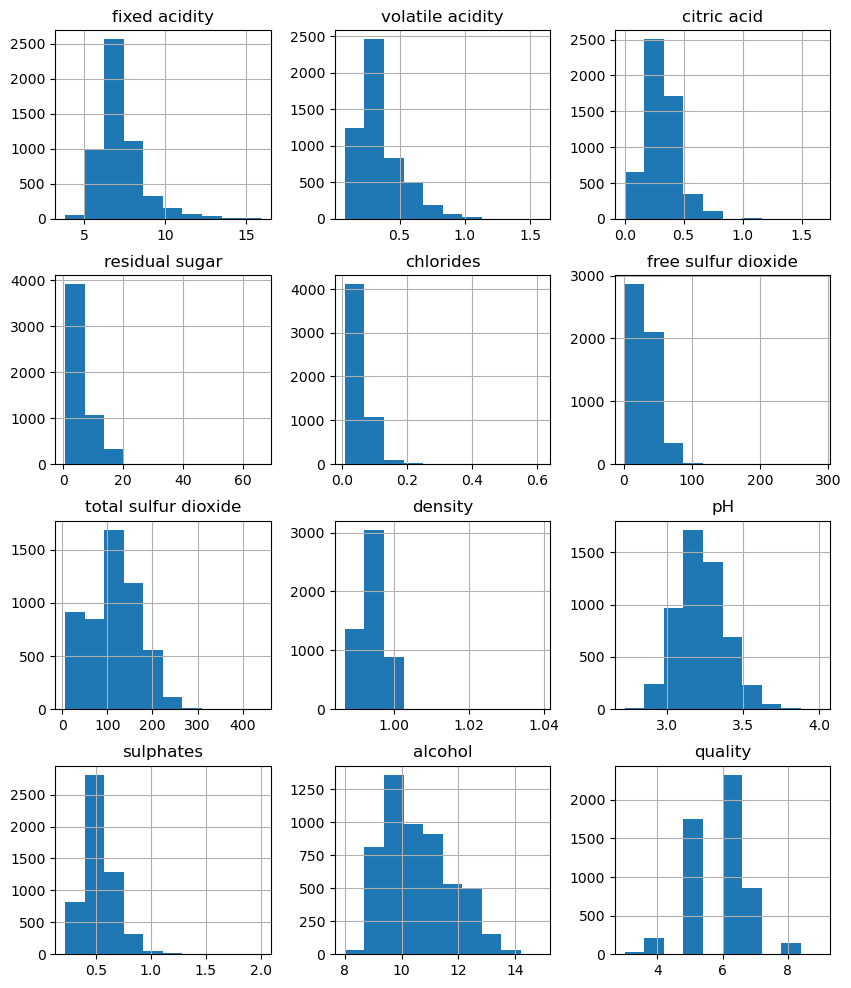

In [49]:
combined_wine_df_numerical.hist(figsize=(10, 12))

Controlling the bins

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

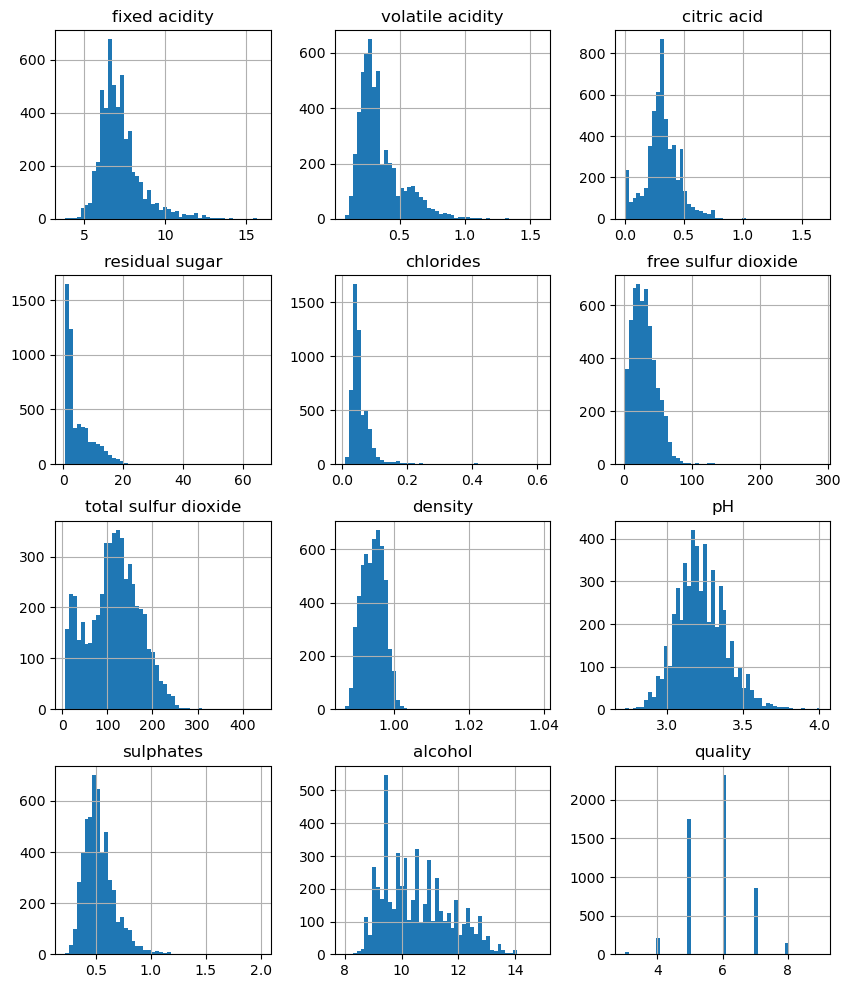

In [51]:
combined_wine_df_numerical.hist(bins=50, figsize=(10, 12))

#### 5.3.2) Histogram of quality  

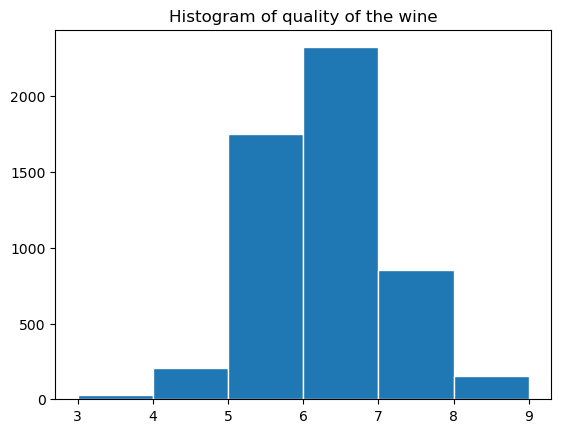

In [53]:
plt.hist(combined_wine_df_numerical['quality'], bins=6, edgecolor = 'white')
plt.title("Histogram of quality of the wine")

plt.show()

#### 5.3.2) Histogram of the chlorides

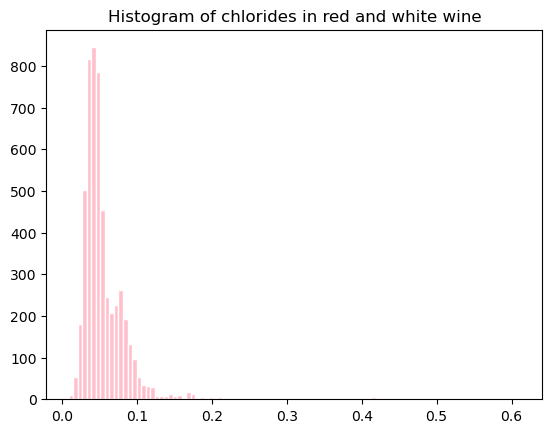

In [55]:
plt.hist(combined_wine_df_numerical['chlorides'], bins=100, edgecolor = 'white', color="pink")
plt.title("Histogram of chlorides in red and white wine")

plt.show()

##### 5.3.2.1) For fun: Using my own function to get the outliers of the data

In [57]:
from bi_functions_tobias import calculate_outliers


In [58]:
df_no_outliers_of_all_numcol_except_quality = calculate_outliers(combined_wine_df_numerical, True, True, True, "quality")
#df_no_outliers_of_all_numcol_except_quality.describe()


No outliers calculated for the column arguments
Number of outliers in fixed acidity: 304
Number of outliers in volatile acidity: 279
Number of outliers in citric acid: 143
Number of outliers in residual sugar: 141
Number of outliers in chlorides: 237
Number of outliers in free sulfur dioxide: 44
Number of outliers in total sulfur dioxide: 10
Number of outliers in density: 3
Number of outliers in pH: 49
Number of outliers in sulphates: 163
Number of outliers in alcohol: 1
Total number of outliers: 1374
Total number of rows deleted in returned data frame: 1374


In [59]:
combined_wine_df_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,2660.500000
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,1535.896047
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,1330.750000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,2660.500000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,3990.250000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,5320.000000


In [60]:
df_no_outliers_of_chosen_columns= calculate_outliers(combined_wine_df_numerical, True, False, True, "chlorides", "density", "fixed acidity")

df_no_outliers_of_chosen_columns.describe()

Outliers only calculated for the column arguments
Number of outliers in chlorides: 237
Number of outliers in density: 3
Number of outliers in fixed acidity: 304
Total number of outliers: 544
Total number of rows deleted in returned data frame: 544


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
count,4816.000000,4816.000000,4816.000000,4816.00000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.000000,4816.00000
mean,6.982309,0.333281,0.305681,5.21847,0.049715,31.118044,119.091466,0.994247,3.231017,0.518870,10.582108,5.812085,2810.27201
std,0.921707,0.162197,0.137053,4.51409,0.018098,17.551489,54.621683,0.002792,0.161054,0.129991,1.194486,0.878134,1480.04877
min,4.500000,0.080000,0.000000,0.60000,0.009000,1.000000,6.000000,0.987110,2.790000,0.220000,8.000000,3.000000,1.00000
25%,6.400000,0.220000,0.240000,1.70000,0.037000,18.000000,85.000000,0.992000,3.120000,0.430000,9.500000,5.000000,1592.75000
50%,6.900000,0.290000,0.300000,2.90000,0.046000,29.000000,120.000000,0.994300,3.220000,0.500000,10.400000,6.000000,2840.50000
75%,7.500000,0.390000,0.370000,7.80000,0.057000,42.000000,156.000000,0.996400,3.340000,0.590000,11.400000,6.000000,4084.25000
max,9.600000,1.330000,1.660000,26.05000,0.108000,289.000000,440.000000,1.002950,4.010000,1.620000,14.200000,9.000000,5320.00000


In [61]:
df_no_outliers_of_chosen_columns.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6


(array([  1.,   2.,   5.,   8.,  13.,  20.,  34.,  43.,  69., 117., 156.,
        181., 228., 270., 274., 281., 283., 274., 285., 290., 245., 178.,
        182., 119., 108.,  87.,  58.,  59.,  60.,  63.,  65.,  49.,  68.,
         72.,  72.,  83.,  62.,  64.,  43.,  41.,  35.,  31.,  32.,  30.,
         23.,  15.,  12.,  12.,   7.,   7.]),
 array([0.009  , 0.01098, 0.01296, 0.01494, 0.01692, 0.0189 , 0.02088,
        0.02286, 0.02484, 0.02682, 0.0288 , 0.03078, 0.03276, 0.03474,
        0.03672, 0.0387 , 0.04068, 0.04266, 0.04464, 0.04662, 0.0486 ,
        0.05058, 0.05256, 0.05454, 0.05652, 0.0585 , 0.06048, 0.06246,
        0.06444, 0.06642, 0.0684 , 0.07038, 0.07236, 0.07434, 0.07632,
        0.0783 , 0.08028, 0.08226, 0.08424, 0.08622, 0.0882 , 0.09018,
        0.09216, 0.09414, 0.09612, 0.0981 , 0.10008, 0.10206, 0.10404,
        0.10602, 0.108  ]),
 <BarContainer object of 50 artists>)

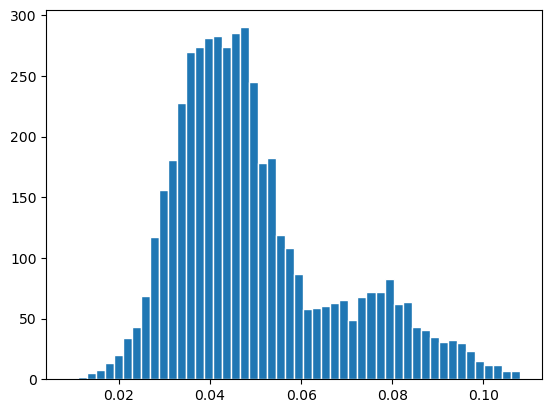

In [62]:
plt.hist(df_no_outliers_of_chosen_columns["chlorides"], bins=50, edgecolor="white")

In [63]:
skewness_of_chlorides_no_outliers = df_no_outliers_of_chosen_columns["chlorides"].skew()

print(skewness_of_chlorides_no_outliers)

0.9344217607149731


In [64]:
dict_with_outlier_data = calculate_outliers(combined_wine_df_numerical, False, False, True)

No column arguments chosen. Outliers for all columns with numerical values are calculated
Number of outliers in fixed acidity: 304
Number of outliers in volatile acidity: 279
Number of outliers in citric acid: 143
Number of outliers in residual sugar: 141
Number of outliers in chlorides: 237
Number of outliers in free sulfur dioxide: 44
Number of outliers in total sulfur dioxide: 10
Number of outliers in density: 3
Number of outliers in pH: 49
Number of outliers in sulphates: 163
Number of outliers in alcohol: 1
Number of outliers in quality: 183
Number of outliers in ID: 0
Total number of outliers: 1557
Total number of rows deleted in returned data frame: 1557


In [65]:
df_no_outliers_2 = dict_with_outlier_data["df_without_outliers"]

outliers_of_residual_sugar = dict_with_outlier_data["residual sugar"]["outliers"]

combined_wine_df_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,2660.500000
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,1535.896047
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,1330.750000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,2660.500000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,3990.250000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,5320.000000


In [66]:
df_no_outliers_2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000
mean,6.961725,0.311032,0.306587,4.937479,0.048528,30.861799,120.331659,0.993997,3.222191,0.508785,10.591284,5.791718,2916.271012
std,0.899279,0.126361,0.115979,4.036692,0.017336,15.859204,51.630389,0.002643,0.150019,0.115399,1.162349,0.774749,1453.489466
min,4.700000,0.080000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987110,2.790000,0.220000,8.400000,4.000000,5.000000
25%,6.300000,0.220000,0.250000,1.700000,0.036000,19.000000,89.000000,0.991880,3.120000,0.420000,9.600000,5.000000,1740.000000
50%,6.900000,0.280000,0.310000,2.900000,0.045000,29.000000,121.000000,0.994000,3.220000,0.500000,10.400000,6.000000,2981.000000
75%,7.500000,0.370000,0.370000,7.600000,0.055000,41.000000,156.000000,0.996040,3.320000,0.580000,11.400000,6.000000,4166.000000
max,9.600000,0.675000,0.640000,16.050000,0.108000,78.000000,272.000000,1.000800,3.660000,0.850000,14.200000,7.000000,5320.000000


## 6) Visualization with diagrams

### 6.1) What does diagrams show exactly?

### 6.2) Which wine type has higher average quality?

Text(0.5, 5.73904351459103, 'Difference: 0.23158')

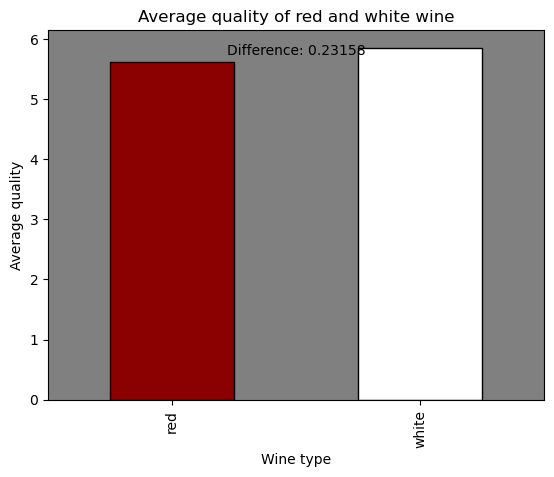

In [70]:
avg_quality = combined_wine_df.groupby("wine type")["quality"].mean()


fig, ax = plt.subplots()

avg_quality.plot(kind='bar', color=['darkred', 'white'], edgecolor='black', ax=ax)

plt.title("Average quality of red and white wine")
plt.xlabel("Wine type")
plt.ylabel("Average quality")
ax.set_facecolor("gray")

diff = avg_quality['white'] - avg_quality['red']

# A text (label) is added to the plot. 
# First argument is the placement of the text box on the x-axis = 0.5
# Second argument is text box on the y-axis = (...)/2
# Third is the text to be shown. Here it is a formatted string where the diff variables is shown with 2 decimals (:.2f)
# Fourth (ha="") is the placement of the text inside the text box on the  axis ha = horizontal alignment
plt.text(0.5, (avg_quality['white'] + avg_quality['red']) / 2, f'Difference: {diff:.5f}', ha='center')


### 6.3) Which type of wine has higher level of alcohol

Text(1, 9.999357906252628, '10.59')

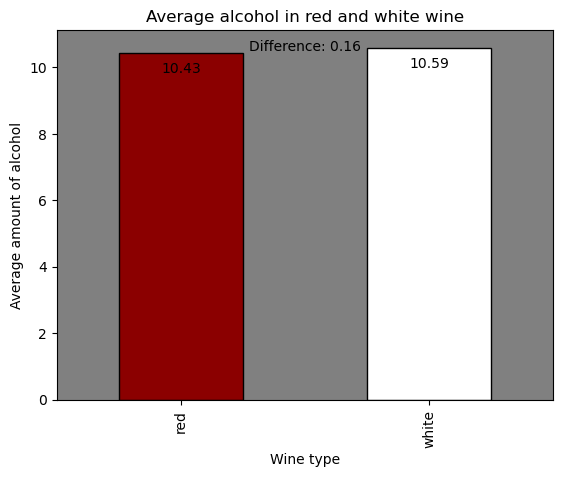

In [72]:
avg_alcohol = combined_wine_df.groupby("wine type")["alcohol"].mean()


fig, ax = plt.subplots()

avg_alcohol.plot(kind='bar', color=['darkred', 'white'], edgecolor='black', ax=ax)

plt.title("Average alcohol in red and white wine")
plt.xlabel("Wine type")
plt.ylabel("Average amount of alcohol")
ax.set_facecolor("gray")

diff = avg_alcohol['white'] - avg_alcohol['red']

# A text (label) is added to the plot. 
# First argument is the placement of the text box on the x-axis = 0.5
# Second argument is text box on the y-axis = (...)/2
# Third is the text to be shown. Here it is a formatted string where the diff variables is shown with 2 decimals (:.2f)
# Fourth (ha="") is the placement of the text inside the text box on the  axis ha = horizontal alignment
plt.text(0.5, (avg_alcohol['white'] + avg_alcohol['red']) / 2, f'Difference: {diff:.2f}', ha='center')

plt.text(0, avg_alcohol['red']-.59, f"{avg_alcohol['red']:.2f}", ha="center")
plt.text(1, avg_alcohol['white']-.59, f"{avg_alcohol['white']:.2f}", ha="center")


### 6.4) Which type of wine has higher average quantity of residual sugar?

Text(1, 5.61481949002777, '5.91')

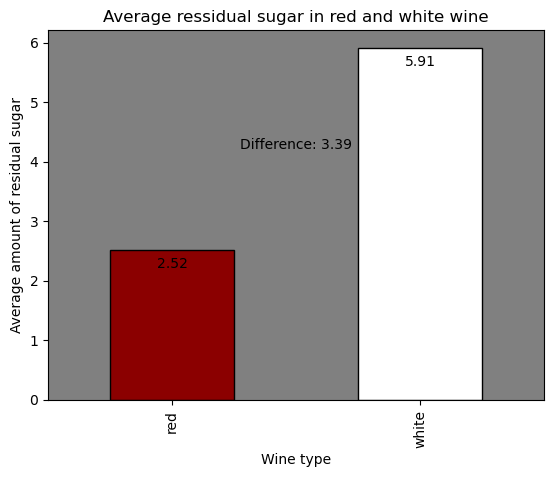

In [74]:
avg_sugar = combined_wine_df.groupby("wine type")["residual sugar"].mean()


fig, ax = plt.subplots()

avg_sugar.plot(kind='bar', color=['darkred', 'white'], edgecolor='black', ax=ax)

plt.title("Average ressidual sugar in red and white wine")
plt.xlabel("Wine type")
plt.ylabel("Average amount of residual sugar")
ax.set_facecolor("gray")

diff = avg_sugar['white'] - avg_sugar['red']

# A text (label) is added to the plot. 
# First argument is the placement of the text box on the x-axis = 0.5
# Second argument is text box on the y-axis = (...)/2
# Third is the text to be shown. Here it is a formatted string where the diff variables is shown with 2 decimals (:.2f)
# Fourth (ha="") is the placement of the text inside the text box on the  axis ha = horizontal alignment
plt.text(0.5, (avg_sugar['white'] + avg_sugar['red']) / 2, f'Difference: {diff:.2f}', ha='center')

plt.text(0, avg_sugar['red']-.3, f"{avg_sugar['red']:.2f}", ha="center")
plt.text(1, avg_sugar['white']-.3, f"{avg_sugar['white']:.2f}", ha="center")

### 6.5) Do the quantity of alcohol and residual sugar influence the quality of the wine?

#### 6.5.1) Alcohol and quality

In [77]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [78]:
combined_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(11.5, 8.5, 'r= 0.46942183794115')

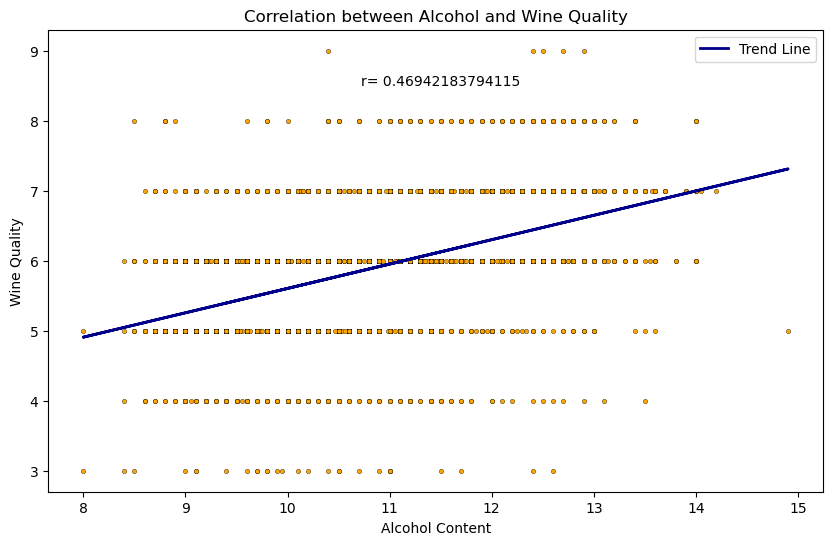

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = combined_wine_df, x="alcohol", y="quality", color="orange", s=10, edgecolor="black")

X = combined_wine_df[['alcohol']]
y = combined_wine_df['quality']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(combined_wine_df['alcohol'], predictions, color='darkblue', linewidth=2, label='Trend Line')

# Add labels and title
plt.title('Correlation between Alcohol and Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()

correlation = combined_wine_df["alcohol"].corr(combined_wine_df["quality"])

plt.text(11.5, 8.5, f"r= {correlation}", ha="center")

#### 6.5.2) Alcohol and red wine quality

Text(11.5, 7.5, 'r= 0.4803428980019916')

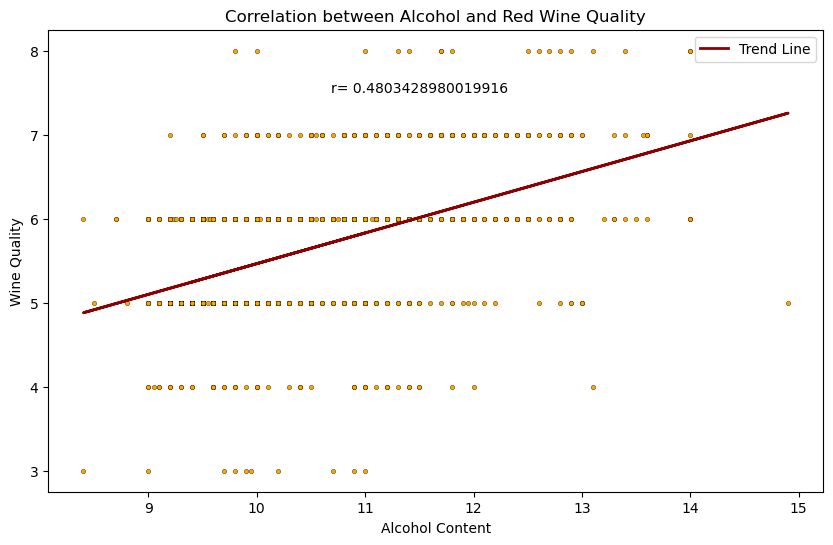

In [81]:
plt.figure(figsize=(10,6))


sns.scatterplot(data = combined_wine_df[combined_wine_df["wine type"] == "red"], x="alcohol", y="quality", color="orange", s=10, edgecolor="black")

X = combined_wine_df[combined_wine_df["wine type"] == "red"][['alcohol']]
y = combined_wine_df[combined_wine_df["wine type"] == "red"]['quality']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(combined_wine_df[combined_wine_df["wine type"] == "red"]['alcohol'], predictions, color='darkred', linewidth=2, label='Trend Line')

# Add labels and title
plt.title('Correlation between Alcohol and Red Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()

correlation = combined_wine_df[combined_wine_df["wine type"] == "red"]["alcohol"].corr(combined_wine_df[combined_wine_df["wine type"] == "red"]["quality"])

plt.text(11.5, 7.5, f"r= {correlation}", ha="center")

#### 6.5.3) Alcohol and white wine quality

Text(11.5, 8.5, 'r= 0.46286932011017956')

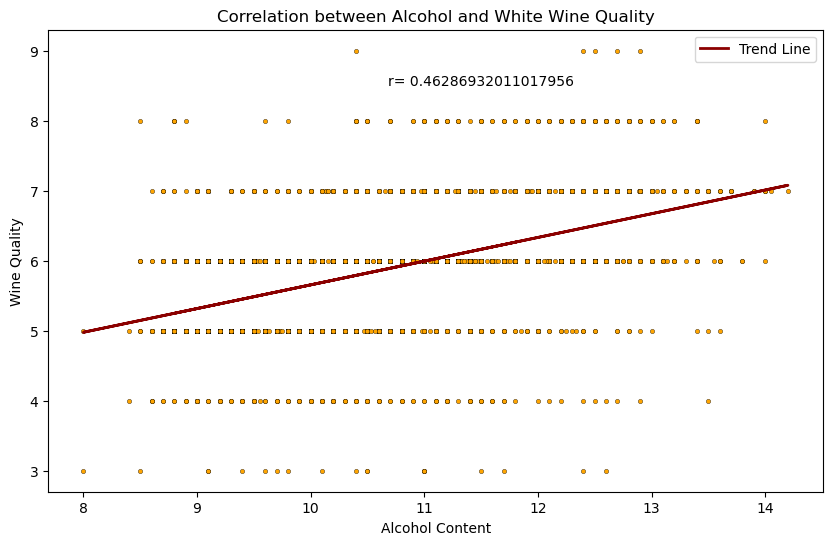

In [83]:
plt.figure(figsize=(10,6))


sns.scatterplot(data = combined_wine_df[combined_wine_df["wine type"] == "white"], x="alcohol", y="quality", color="orange", s=10, edgecolor="black")

X = combined_wine_df[combined_wine_df["wine type"] == "white"][['alcohol']]
y = combined_wine_df[combined_wine_df["wine type"] == "white"]['quality']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(combined_wine_df[combined_wine_df["wine type"] == "white"]['alcohol'], predictions, color='darkred', linewidth=2, label='Trend Line')

# Add labels and title
plt.title('Correlation between Alcohol and White Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()

correlation = combined_wine_df[combined_wine_df["wine type"] == "white"]["alcohol"].corr(combined_wine_df[combined_wine_df["wine type"] == "white"]["quality"])

plt.text(11.5, 8.5, f"r= {correlation}", ha="center")

#### 6.5.4) Residual sugar's correlation with general wine quality 

Text(35, 8.5, 'r= -0.05682967557504293')

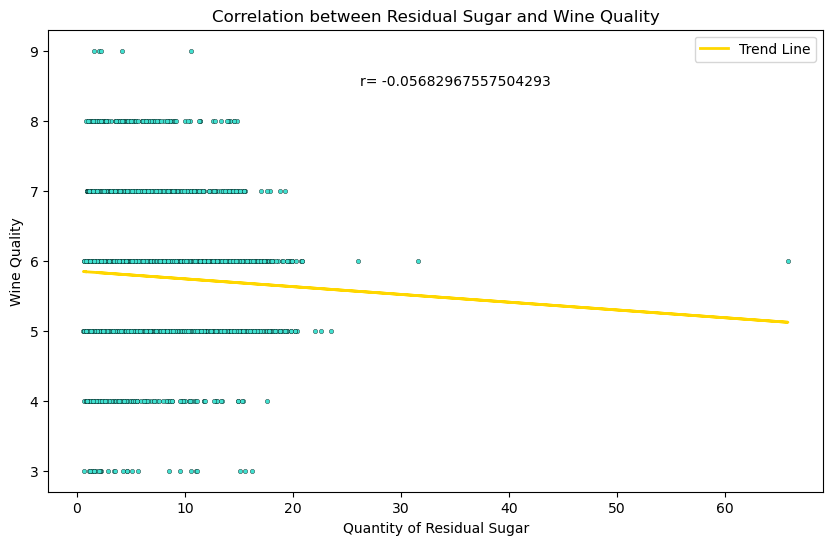

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = combined_wine_df, x="residual sugar", y="quality", color="turquoise", s=10, edgecolor="black")

X = combined_wine_df[['residual sugar']]
y = combined_wine_df['quality']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(combined_wine_df['residual sugar'], predictions, color='gold', linewidth=2, label='Trend Line')

# Add labels and title
plt.title('Correlation between Residual Sugar and Wine Quality')
plt.xlabel('Quantity of Residual Sugar')
plt.ylabel('Wine Quality')
plt.legend()

correlation = combined_wine_df["residual sugar"].corr(combined_wine_df["quality"])

plt.text(35, 8.5, f"r= {correlation}", ha="center")

#### (Me experimenting with the correlation between quality and the combination of the level of alcohol and residual sugar)

C:\Users\acm11\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


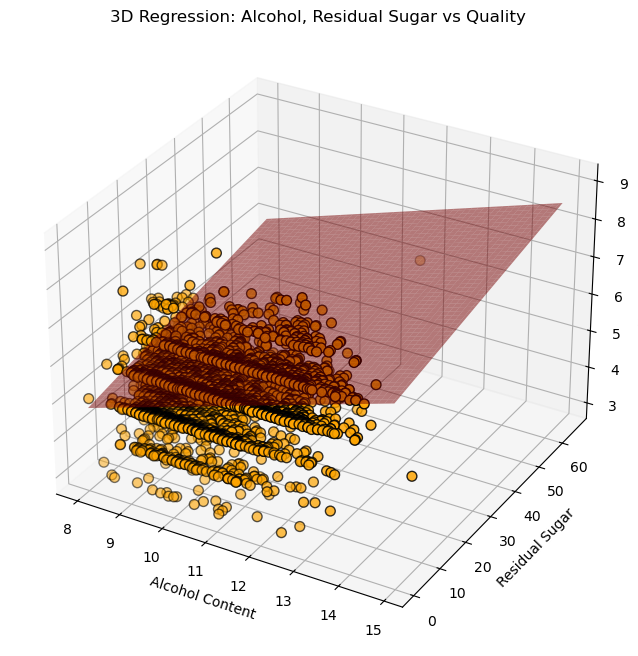

In [87]:

import numpy as np


# Fit a linear regression model
X_alc_sug = combined_wine_df[['alcohol', 'residual sugar']]
y_qual = combined_wine_df['quality']
model = LinearRegression()
model.fit(X_alc_sug, y_qual)

# Creating new column in the data frame with the predicted quality
combined_wine_df['predicted quality'] = model.predict(X_alc_sug)


# Create a grid of values
alcohol_range = np.linspace(combined_wine_df['alcohol'].min(), combined_wine_df['alcohol'].max(), 100)
residual_sugar_range = np.linspace(combined_wine_df['residual sugar'].min(), combined_wine_df['residual sugar'].max(), 100)

#print("Alcohol range: ")
#print(alcohol_range)

#print("\nResidual Sugar range: ")
#print(residual_sugar_range)


alcohol_grid, residual_sugar_grid = np.meshgrid(alcohol_range, residual_sugar_range)

predictions_grid = model.predict(np.c_[alcohol_grid.ravel(), residual_sugar_grid.ravel()])
predictions_grid = predictions_grid.reshape(alcohol_grid.shape)

# Plot the surface
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_wine_df['alcohol'], combined_wine_df['residual sugar'], combined_wine_df['quality'], color='orange', s=50, edgecolor='black')
ax.plot_surface(alcohol_grid, residual_sugar_grid, predictions_grid, color='darkred', alpha=0.5)

# Add labels and title
ax.set_title('3D Regression: Alcohol, Residual Sugar vs Quality')
ax.set_xlabel('Alcohol Content')
ax.set_ylabel('Residual Sugar')
ax.set_zlabel('Wine Quality')

plt.show()

## 7) Which other questions might be of interest for the wine consumers and which of wine distributers?


### 7.1) My short anwser:

If any of the other attributes of the different wines correlates with (/can predict) the quality of the wine

### 7.2) Heat map showing the correlations 

<function matplotlib.pyplot.show(close=None, block=None)>

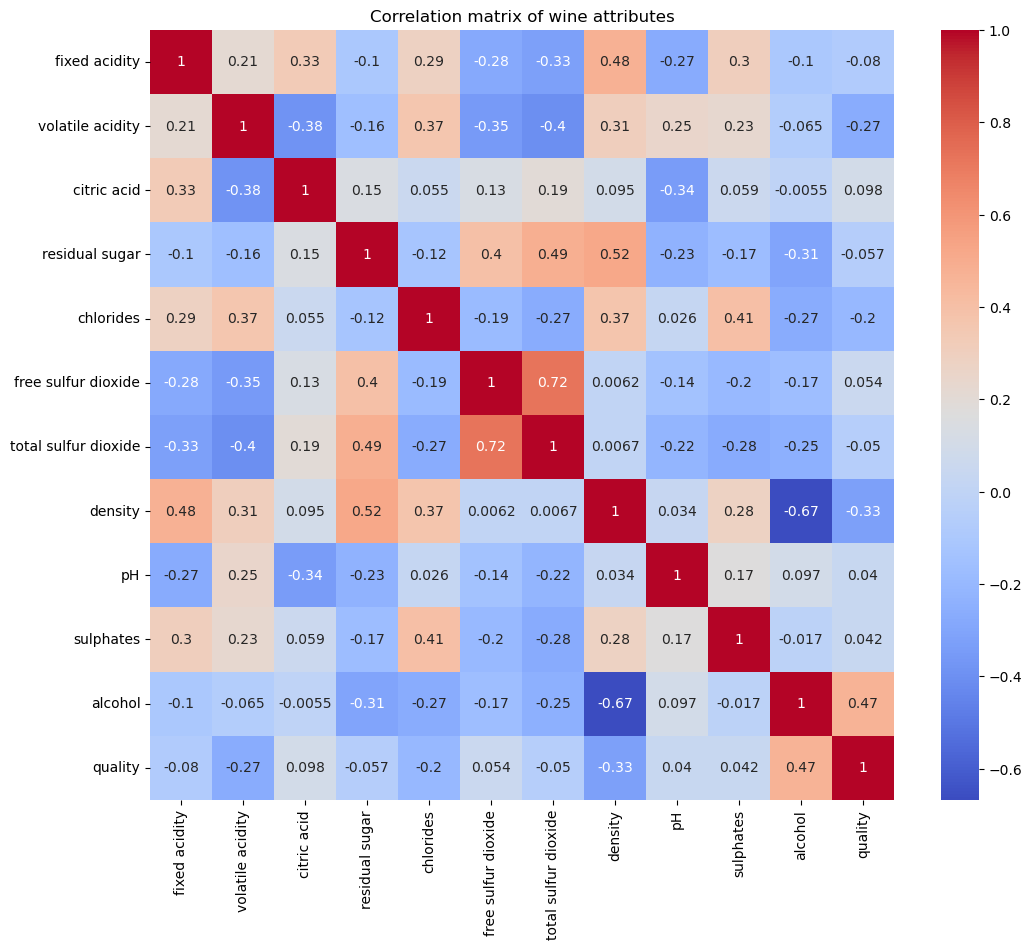

In [92]:
correlation_matrix = combined_wine_df.drop(columns= ["wine type", "predicted quality"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of wine attributes")
plt.show

## 8) Splitting the aggregated data into five subsets by binning the attribute pH


### 8.1) Calculating which subset has highest density

In [95]:
# Define bins and labels for 5 subsets. labels=False means that each row in bin_5 contains a 
# number (instead of a label) to indicate which bin the value of the row is in
# So instead of: 
"""
1 - bin_four
2 - bin_two
3 - bin_four
4 - bin_zero
5 - bin_zero

it's:

1 - 4
2 - 2
3 - 4
4 - 0
5 - 0
"""


combined_wine_df['pH_bin_5'] = pd.cut(combined_wine_df['pH'], bins=5)

# Calculating the percentage of observations/rows/values in each bin 
ph_bin_5_value_count = combined_wine_df['pH_bin_5'].value_counts(normalize=True).sort_index()

ph_bin_highest_percentage = ph_bin_5_value_count.idxmax()
ph_bin_lowest_percentage = ph_bin_5_value_count.idxmin()

print(f'Bin with highest percentage of the observations: {ph_bin_highest_percentage}')
print(f'The count of the bin with highest value: {ph_bin_5_value_count[ph_bin_highest_percentage]}')
print(f"Count of the five subsets: {ph_bin_5_value_count}")


Bin with highest percentage of the observations: (2.978, 3.236]
The count of the bin with highest value: 0.5050751879699248
Count of the five subsets: pH_bin_5
(2.719, 2.978]    0.047556
(2.978, 3.236]    0.505075
(3.236, 3.494]    0.392669
(3.494, 3.752]    0.051692
(3.752, 4.01]     0.003008
Name: proportion, dtype: float64


#### 8.1.1) The Densities

In [97]:

grouped_by_ph_5 = combined_wine_df.groupby('pH_bin_5')['density'].mean().reset_index()

print(grouped_by_ph_5)

         pH_bin_5   density
0  (2.719, 2.978]  0.994323
1  (2.978, 3.236]  0.994500
2  (3.236, 3.494]  0.994579
3  (3.494, 3.752]  0.994799
4   (3.752, 4.01]  0.993582


C:\Users\acm11\AppData\Local\Temp\ipykernel_18100\1550114436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_ph_5 = combined_wine_df.groupby('pH_bin_5')['density'].mean().reset_index()


#### 8.1.2) Getting the bin with the highest density

In [99]:
max = grouped_by_ph_5['density'].max()
max_index = grouped_by_ph_5[grouped_by_ph_5['density'] == max].index[0]

print("Row index of bin with max density: " + str(max_index))


Row index of bin with max density: 3


#### 8.1.3) Visualizing the densities with a bar plot/bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

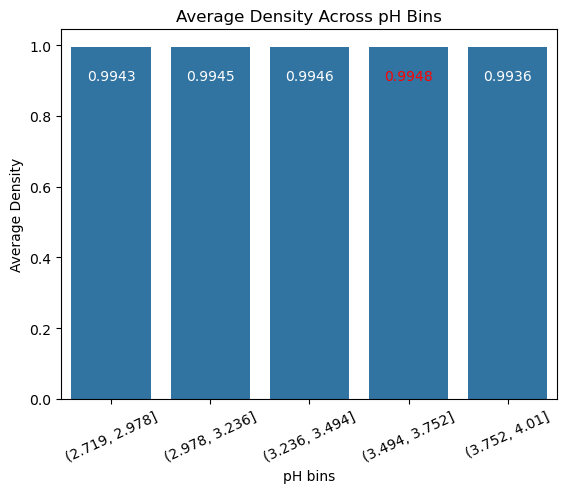

In [101]:
density_0 = grouped_by_ph_5['density'].iloc[0]
density_1 = grouped_by_ph_5['density'].iloc[1]
density_2 = grouped_by_ph_5['density'].iloc[2]
density_3 = grouped_by_ph_5['density'].iloc[3]
density_4 = grouped_by_ph_5['density'].iloc[4]

sns.barplot(x='pH_bin_5', y='density', data=grouped_by_ph_5)
plt.xlabel("pH bins")
plt.ylabel("Average Density")
plt.title("Average Density Across pH Bins")
plt.xticks(rotation=25)

plt.text(0, 0.9, f'{density_0:.4f}', ha="center", color="white")
plt.text(1, 0.9, f'{density_1:.4f}', ha="center", color="white")
plt.text(2, 0.9, f'{density_2:.4f}', ha="center", color="white")
plt.text(3, 0.9, f'{density_3:.4f}', ha="center", color="red")
plt.text(4, 0.9, f'{density_4:.4f}', ha="center", color="white")
plt.show

### 8.2) What if you split the data in ten subsets?

In [103]:
# 10 bins in a column
combined_wine_df['pH_bin_10'] = pd.cut(combined_wine_df['pH'], bins=10)

grouped_by_ph_10 = combined_wine_df.groupby('pH_bin_10')['density'].mean().reset_index()

print(grouped_by_ph_10)



        pH_bin_10   density
0  (2.719, 2.849]  0.993128
1  (2.849, 2.978]  0.994393
2  (2.978, 3.107]  0.994496
3  (3.107, 3.236]  0.994502
4  (3.236, 3.365]  0.994373
5  (3.365, 3.494]  0.995001
6  (3.494, 3.623]  0.994865
7  (3.623, 3.752]  0.994475
8  (3.752, 3.881]  0.993888
9   (3.881, 4.01]  0.992665


C:\Users\acm11\AppData\Local\Temp\ipykernel_18100\3637943200.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_ph_10 = combined_wine_df.groupby('pH_bin_10')['density'].mean().reset_index()


In [104]:
# Identifying the subset with the highest density
max_10 = grouped_by_ph_10['density'].max()
max_index_10 = grouped_by_ph_10[grouped_by_ph_10['density'] == max_10].index[0]

print("Index of bin with highest density: " + str(max_index))

Index of bin with highest density: 3


<function matplotlib.pyplot.show(close=None, block=None)>

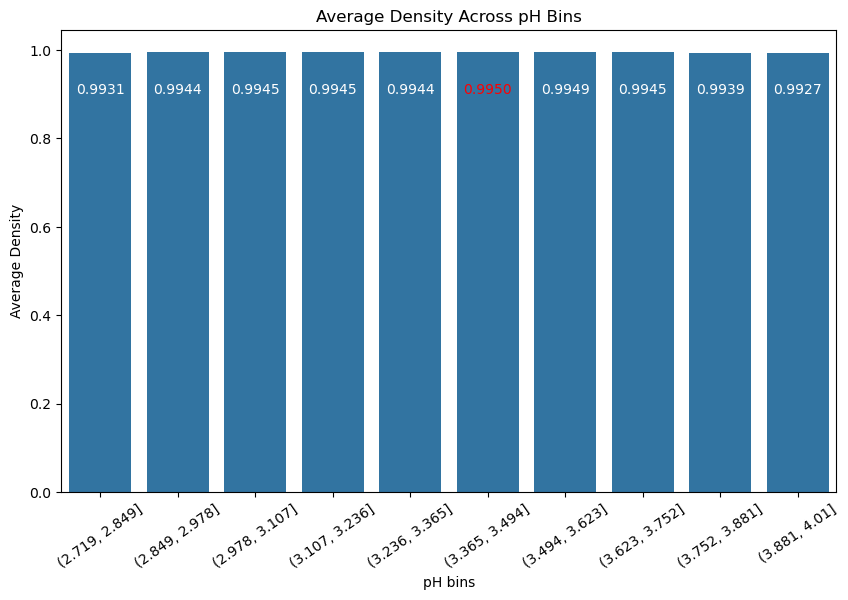

In [105]:
density_10_0 = grouped_by_ph_10['density'].iloc[0]
density_10_1 = grouped_by_ph_10['density'].iloc[1]
density_10_2 = grouped_by_ph_10['density'].iloc[2]
density_10_3 = grouped_by_ph_10['density'].iloc[3]
density_10_4 = grouped_by_ph_10['density'].iloc[4]
density_10_5 = grouped_by_ph_10['density'].iloc[5]
density_10_6 = grouped_by_ph_10['density'].iloc[6]
density_10_7 = grouped_by_ph_10['density'].iloc[7]
density_10_8 = grouped_by_ph_10['density'].iloc[8]
density_10_9 = grouped_by_ph_10['density'].iloc[9]

plt.figure(figsize=(10, 6))  

sns.barplot(x='pH_bin_10', y='density', data=grouped_by_ph_10)
plt.xlabel("pH bins")
plt.ylabel("Average Density")
plt.title("Average Density Across pH Bins")
plt.xticks(rotation=35)

plt.text(0, 0.9, f'{density_10_0:.4f}', ha="center", color="white")
plt.text(1, 0.9, f'{density_10_1:.4f}', ha="center", color="white")
plt.text(2, 0.9, f'{density_10_2:.4f}', ha="center", color="white")
plt.text(3, 0.9, f'{density_10_3:.4f}', ha="center", color="white")
plt.text(4, 0.9, f'{density_10_4:.4f}', ha="center", color="white")
plt.text(5, 0.9, f'{density_10_5:.4f}', ha="center", color="red")
plt.text(6, 0.9, f'{density_10_6:.4f}', ha="center", color="white")
plt.text(7, 0.9, f'{density_10_7:.4f}', ha="center", color="white")
plt.text(8, 0.9, f'{density_10_8:.4f}', ha="center", color="white")
plt.text(9, 0.9, f'{density_10_9:.4f}', ha="center", color="white")
plt.show

## 9) Heat map (correlation matrix)

### 9.1) Creating the heat map

In [108]:
combined_wine_df.drop(columns=["pH_bin_5", "pH_bin_10"], inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

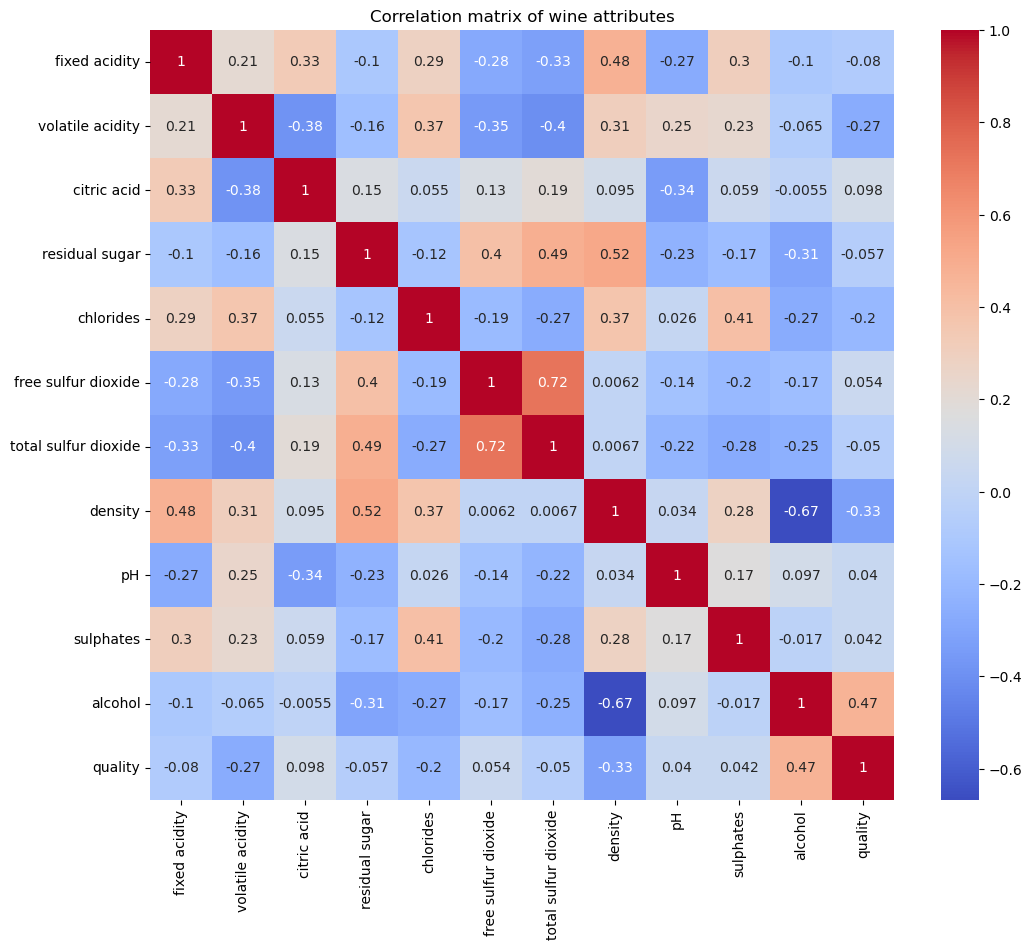

In [109]:

correlation_matrix = combined_wine_df.drop(columns= ["wine type", "predicted quality"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of wine attributes")
plt.show

### 9.2) Anwering the questions: 

- It seems like the amount of alcohol in the wine has the biggest influence on the quality of the wine with a moderate correlation of 0.47.
  Next is density

- The smallest influence seems to be pH with a correlation of 0.04

- Alcohol and density are highly correlated (or more than moderate correlated at least) with a negative correlation of -0.67
  Also: free and total sulfur dioxide har highly correlated


## 10) Do you get the same correlation results when you analyze the red and the white wine data sets separately?


ANSWER: "NO" (Check below)

In [114]:
red_wine_df_without_wine_type = combined_wine_df[combined_wine_df["wine type"] == "red"].drop(columns= ["wine type", "predicted quality", ])


In [115]:
white_wine_df_without_wine_type = combined_wine_df[combined_wine_df["wine type"] == "white"].drop(columns= ["wine type", "predicted quality"])


<function matplotlib.pyplot.show(close=None, block=None)>

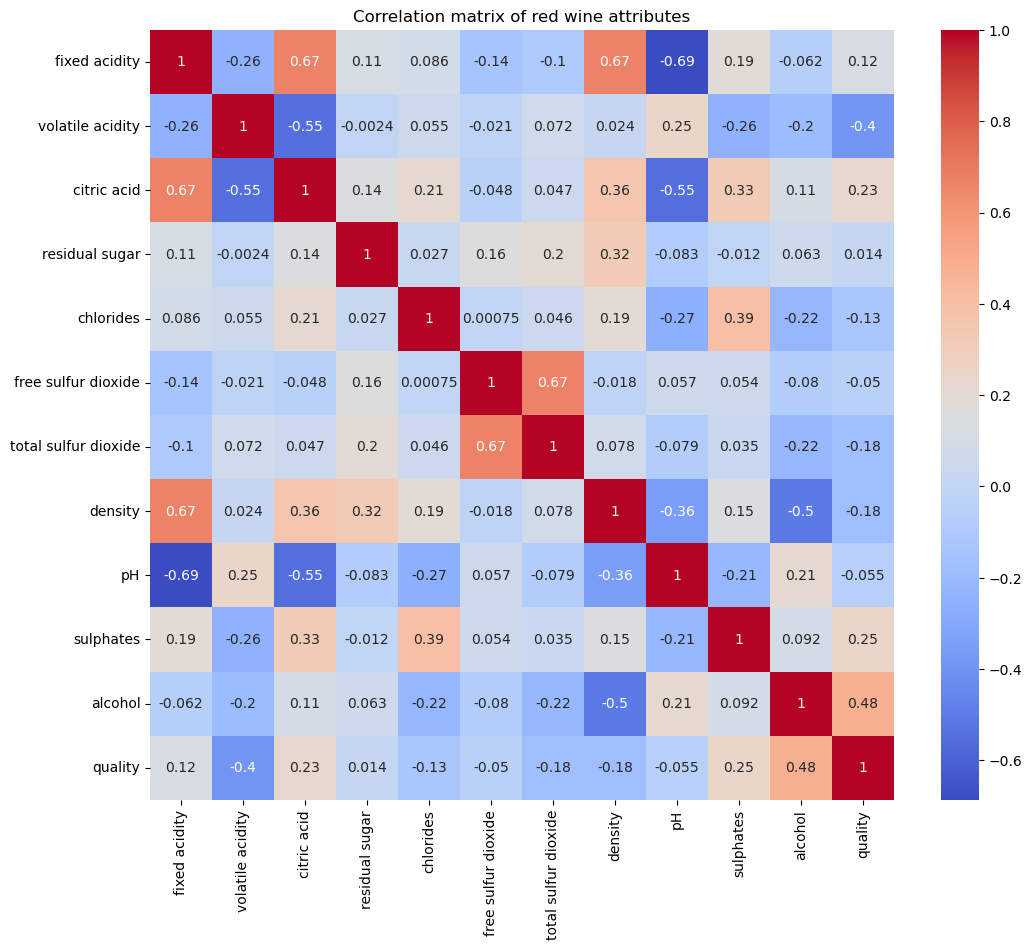

In [116]:

correlation_matrix_red = red_wine_df_without_wine_type.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_red, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of red wine attributes")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

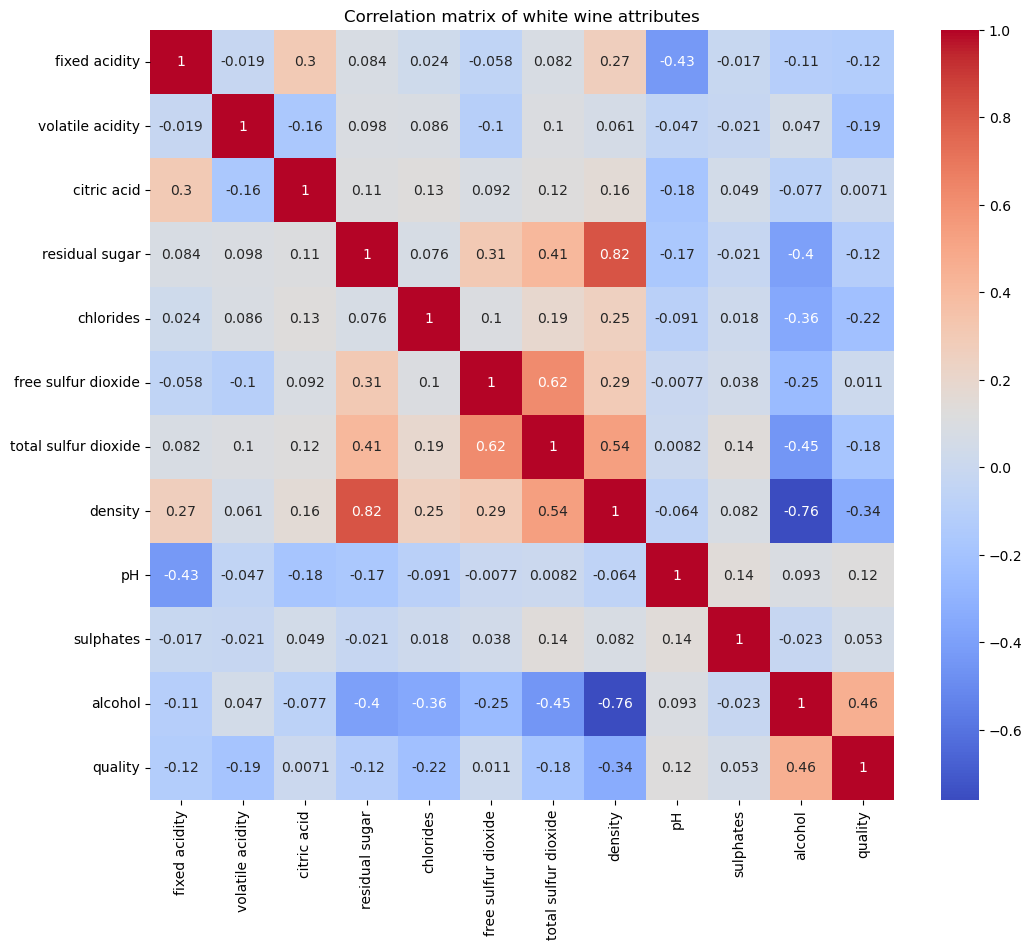

In [117]:
correlation_matrix_white = white_wine_df_without_wine_type.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_white, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of white wine attributes")
plt.show

## 11) Exploring the feature 'residual sugar'

### 11.1) Finding outliers in residual sugar and 11.2) Removing the rows which are outliers in residual sugar

In [120]:
dict_with_data = calculate_outliers(combined_wine_df, False, False, True, "residual sugar")

outliers_of_sugar = dict_with_data["residual sugar"]["outliers"]

no_sugar_out_df = dict_with_data["df_without_outliers"]



Outliers only calculated for the column arguments
Number of outliers in residual sugar: 141
Total number of outliers: 141
Total number of rows deleted in returned data frame: 141


In [121]:
no_sugar_out_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,predicted quality,ID
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,5.311975,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,5.472952,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,5.467360,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,5.459905,4
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,5.310111,5


## 12) Removing the attributes with the lowest correlation to the wine quality and any one highly correlated to another independent attribute.


### 12.1) Removing rows with an absolute correlation below 0.3

<function matplotlib.pyplot.show(close=None, block=None)>

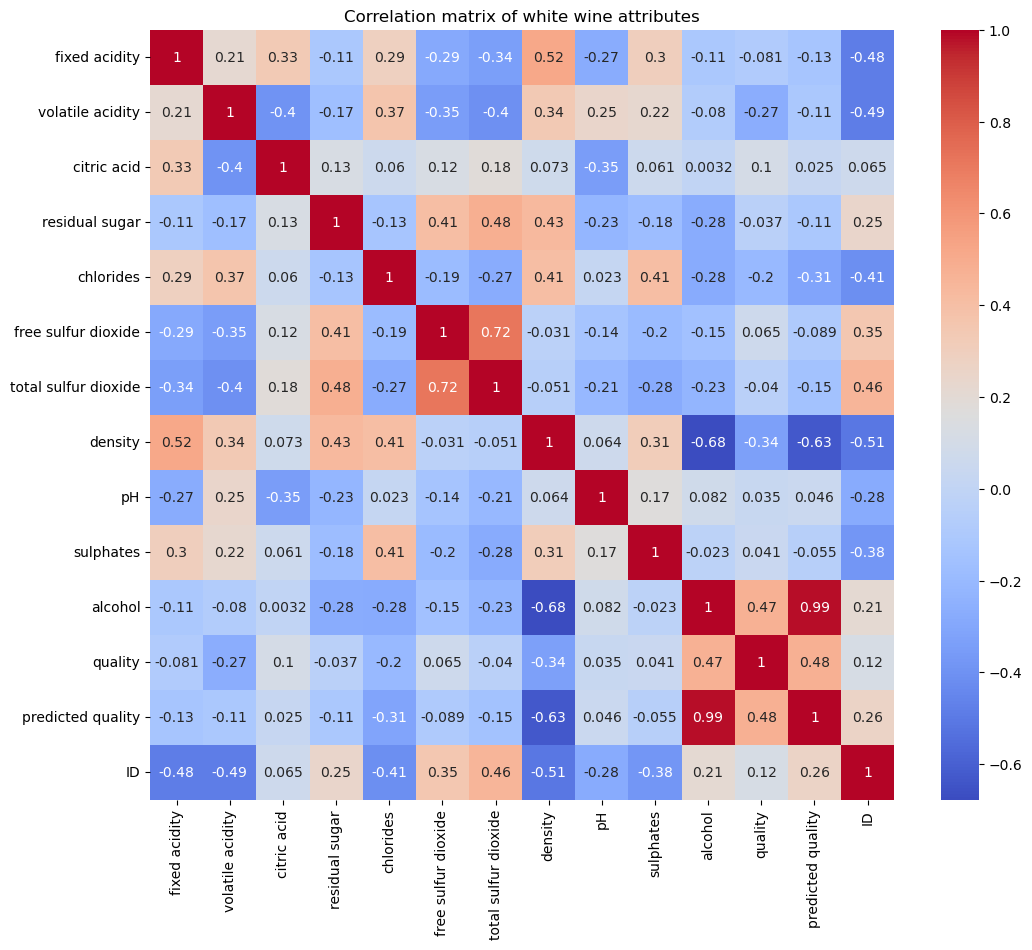

In [124]:

corr_matrix_no_sugar = no_sugar_out_df.drop(columns="wine type").corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_no_sugar, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of white wine attributes")
plt.show



In [125]:
# Extract the correlation values for quality
corr_with_quality = corr_matrix_no_sugar['quality']

print(corr_with_quality)


fixed acidity          -0.081292
volatile acidity       -0.270635
citric acid             0.104877
residual sugar         -0.036811
chlorides              -0.204291
free sulfur dioxide     0.064755
total sulfur dioxide   -0.039874
density                -0.336019
pH                      0.035487
sulphates               0.040692
alcohol                 0.472202
quality                 1.000000
predicted quality       0.481861
ID                      0.116126
Name: quality, dtype: float64


In [126]:
# Identifying columns with correlation less than 0.3
low_corr_columns = corr_with_quality[abs(corr_with_quality) < 0.3].index.tolist()

print(low_corr_columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'ID']


In [127]:

# Removing quality itself from the list: Going through the list and filtering so that all columns which aren't 'quality' are stored in the variable
low_corr_columns = [col for col in low_corr_columns if col != 'quality']

print(low_corr_columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'ID']


In [128]:
no_low_corr_df = no_sugar_out_df.drop(columns=low_corr_columns)

In [129]:
no_low_corr_df.head()

,density,alcohol,quality,wine type,predicted quality
0,0.9978,9.4,5,red,5.311975
1,0.9968,9.8,5,red,5.472952
2,0.9970,9.8,5,red,5.467360
3,0.9980,9.8,6,red,5.459905
4,0.9978,9.4,5,red,5.310111


## 13) Transforming categorical data to numerical data 

In [131]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

no_low_corr_df["wine type"] = label_encoder.fit_transform(no_low_corr_df['wine type'])

no_low_corr_df.describe()

,density,alcohol,quality,wine type,predicted quality
count,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000
mean,0.994391,10.580057,5.803630,0.737594,5.800248
std,0.002809,1.179328,0.884536,0.439985,0.421849
min,0.987110,8.000000,3.000000,0.000000,4.776513
25%,0.992120,9.583333,5.000000,0.000000,5.454756
50%,0.994500,10.400000,6.000000,1.000000,5.720646
75%,0.996600,11.400000,6.000000,1.000000,6.055352
max,1.003690,14.900000,9.000000,1.000000,7.450389


## 14) Printing 10 random rows 

In [133]:
random_rows = no_low_corr_df.sample(n=10, random_state=1)
random_rows

,density,alcohol,quality,wine type,predicted quality
200,0.99745,10.4,4,0,5.683664
2095,0.99530,9.9,6,1,5.496887
1638,0.99200,10.4,5,1,5.670616
3470,0.99669,10.6,5,1,5.919786
1162,0.99623,9.2,5,0,5.234282
3183,0.99000,11.7,6,1,6.145797
4915,0.99611,9.9,5,1,5.690731
2938,0.99970,9.2,5,1,5.501749
3911,0.99709,10.3,5,1,5.883394
2593,0.99460,10.8,6,1,5.894965
